<a href="https://colab.research.google.com/github/rattlesczck/stockpredictor/blob/main/Stockpredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestClassifier

snp500 = yf.Ticker("^GSPC")
snp500 = snp500.history(period="max") #get the snp500 data from as long as possible

snp500.drop(columns=['Dividends', 'Stock Splits'], inplace=True) #remove the columns 'dividends' and 'stock splits'
print(snp500)

snp500.index

                                  Open         High          Low        Close      Volume
Date                                                                                     
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000           0
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000           0
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999           0
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999           0
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000           0
...                                ...          ...          ...          ...         ...
2024-10-31 00:00:00-04:00  5775.339844  5775.339844  5702.859863  5705.450195  4425660000
2024-11-01 00:00:00-04:00  5723.220215  5772.520020  5723.220215  5728.799805  3796450000
2024-11-04 00:00:00-05:00  5725.149902  5741.430176  5696.509766  5712.689941  3602060000
2024-11-05

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00', '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00', '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00', '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00', '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-10-24 00:00:00-04:00', '2024-10-25 00:00:00-04:00', '2024-10-28 00:00:00-04:00', '2024-10-29 00:00:00-04:00', '2024-10-30 00:00:00-04:00', '2024-10-31 00:00:00-04:00', '2024-11-01 00:00:00-04:00', '2024-11-04 00:00:00-05:00', '2024-11-05 00:00:00-05:00', '2024-11-06 00:00:00-05:00'], dtype='datetime64[ns, America/New_York]', name='Date', length=24330, freq=None)

<Axes: title={'center': 'S&P500 Index'}, xlabel='Date'>

<Figure size 1000x900 with 0 Axes>

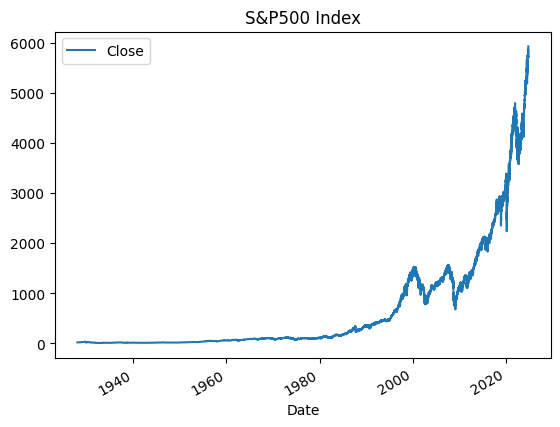

In [ ]:
plt.figure(figsize=(10,9))
snp500.plot.line(y='Close', use_index=True, title='S&P500 Index')


In [ ]:
snp500["Tomorrow"] = snp500['Close'].shift(-1)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
print(snp500)

snp500["Target"] = (snp500['Tomorrow'] > snp500['Close']).astype(int) #if tmrw is greater than close price of today
print(snp500)

snp500 = snp500.loc["1990-01-01":].copy() #code to pick the data only from 1990 to till date but we'll try with and without this

                                  Open         High          Low        Close      Volume     Tomorrow
Date                                                                                                  
1927-12-30 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000           0    17.760000
1928-01-03 00:00:00-05:00    17.760000    17.760000    17.760000    17.760000           0    17.719999
1928-01-04 00:00:00-05:00    17.719999    17.719999    17.719999    17.719999           0    17.549999
1928-01-05 00:00:00-05:00    17.549999    17.549999    17.549999    17.549999           0    17.660000
1928-01-06 00:00:00-05:00    17.660000    17.660000    17.660000    17.660000           0    17.500000
...                                ...          ...          ...          ...         ...          ...
2024-10-31 00:00:00-04:00  5775.339844  5775.339844  5702.859863  5705.450195  4425660000  5728.799805
2024-11-01 00:00:00-04:00  5723.220215  5772.520020  5723.220215  5728.79

In [ ]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1) #no. of decision trees in the forest, model only splits a node if there are min 100 samples in tht node
# seed to ensure repeated running of code gives same/similar results

train = snp500.iloc[:-100]
test = snp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

Date
2024-06-17 00:00:00-04:00    0
2024-06-18 00:00:00-04:00    0
2024-06-20 00:00:00-04:00    0
2024-06-21 00:00:00-04:00    0
2024-06-24 00:00:00-04:00    0
                            ..
2024-10-31 00:00:00-04:00    0
2024-11-01 00:00:00-04:00    0
2024-11-04 00:00:00-05:00    0
2024-11-05 00:00:00-05:00    0
2024-11-06 00:00:00-05:00    0
Length: 100, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: xlabel='Date'>

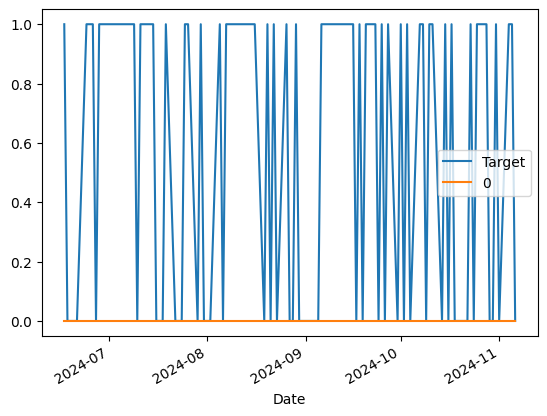

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index = test.index)
print(preds)
precision_score(test["Target"], preds)

combined = pd.concat([test["Target"], preds], axis=1)
combined.plot() #blue is actually happened.

In [ ]:
#backtesting stuff
from joblib import Parallel, delayed

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtester(data, model, predictors, start=2500, step=150, window_size=1000):
    predictions = []

    for i in range(start, data.shape[0], step):
        # Limit training data to a fixed window size (e.g., last 1000 data points)
        train = data.iloc[max(0, i - window_size):i].copy()
        test = data.iloc[i:(i + step)].copy()
        predictions.append(predict(train, test, predictors, model))

    return pd.concat(predictions)

# Use joblib to parallelize the backtester function
def backtester_parallel(data, model, predictors, start=2500, step=150, window_size=1000, n_jobs=-1):
    predictions = Parallel(n_jobs=n_jobs)(
        delayed(predict)(data.iloc[max(0, i - window_size):i], data.iloc[i:(i + step)], predictors, model)
        for i in range(start, data.shape[0], step)
    )
    return pd.concat(predictions)


predictions = backtester(snp500, model, predictors)




In [ ]:
# judging the model's accuracy

accuracy = accuracy_score(predictions["Target"], predictions["Predictions"])
print(f"Model Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(predictions["Target"], predictions["Predictions"])
print(f"Model Precision: {precision * 100:.2f}%")

Model Accuracy: 48.74%
Model Precision: 52.80%


In [ ]:
predictions["Returns"] = np.log(snp500['Close'] / snp500['Close'].shift(1))
predictions["Strategy"] = predictions["Predictions"].shift(1) * predictions["Returns"]
cumulative_returns = predictions["Returns"].cumsum()
cumulative_strategy_returns = predictions["Strategy"].cumsum()

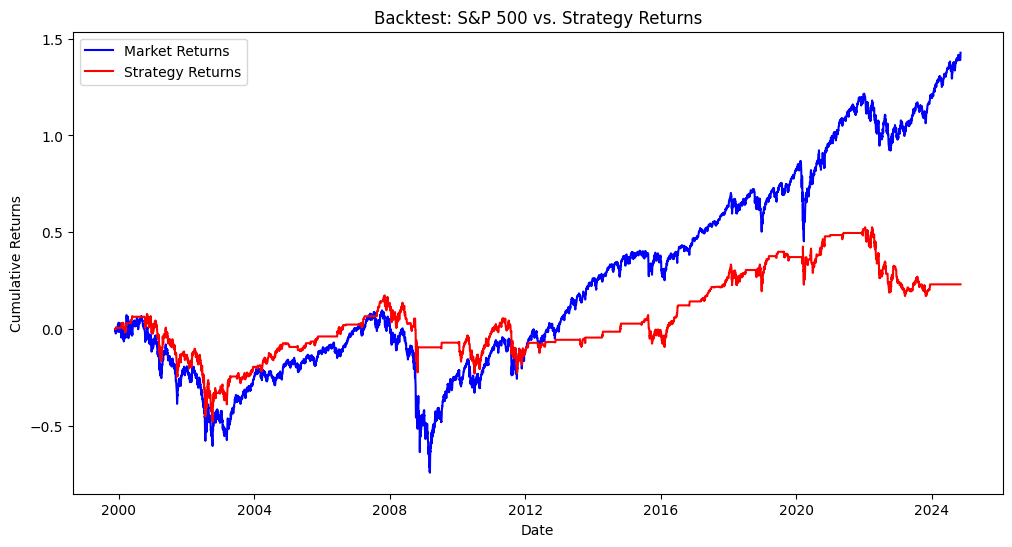

In [ ]:
#plotting results of the model

plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label='Market Returns', color='blue')
plt.plot(cumulative_strategy_returns, label='Strategy Returns', color='red')
plt.title("Backtest: S&P 500 vs. Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.show()

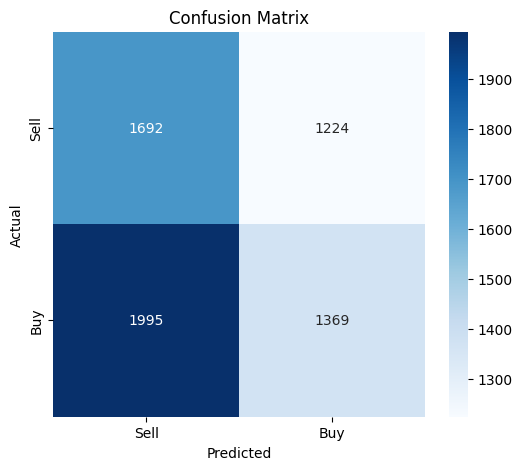

In [ ]:
#confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(predictions["Target"], predictions["Predictions"])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Sell", "Buy"], yticklabels=["Sell", "Buy"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


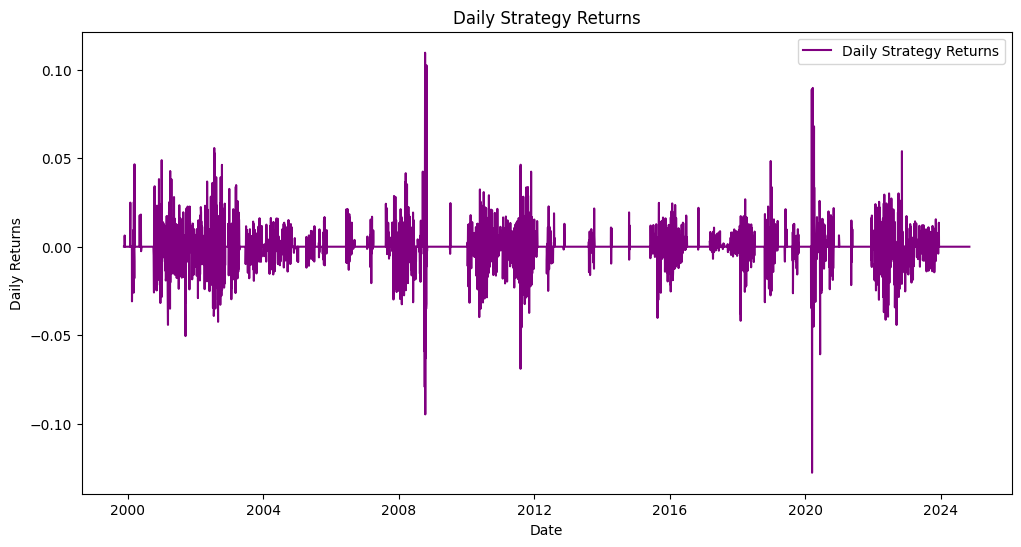

In [ ]:
# Plot daily strategy returns
plt.figure(figsize=(12, 6))
plt.plot(predictions["Strategy"], label="Daily Strategy Returns", color='purple')
plt.title("Daily Strategy Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.legend()
plt.show()
